<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [158]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

In [159]:
cd datasets

[Errno 2] No such file or directory: 'datasets'
/Users/Erika/Desktop/General_Assembly/Unit-3-Restructured/02_Classification/dsi-unit-3.15-classification-knn_intro_to_classification-lab/datasets


In [160]:
ls

NHL_Data_GA.csv


### 1. Load the NHL data

In [161]:
# A: 
nhl = pd.read_csv('NHL_Data_GA.csv')

### 2. Perform any required data cleaning. Do some EDA.

In [162]:
#Taking a look at what our data looks like 
nhl.head().T

,0,1,2,3,4
Team,Washington10,Vancouver11,San Jose10,Chicago10,Vancouver12
PTS,121,117,113,112,111
Rank,1,1,1,1,1
TOI,2001:52:00,2056:14:00,1929:54:00,2020:23:00,2052:02:00
GF,115,94,90,104,86
GA,73,72,68,83,74
GF60,3.45,2.74,2.8,3.09,2.51
GA60,2.19,2.1,2.11,2.46,2.16
GF%,61.2,56.6,57,55.6,53.8
SF,1112,1143,1065,1186,1078


In [163]:
#checking for any null values that currently exist within the data- looks like there aren't any!
nhl.isna().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [164]:
#The TOI value is a combination of hours, minutes, and seconds spent on the ice
#Here I have converted everything to seconds spent on the ice 
TOI_hours = []
TOI_minutes = [] 
TOI_seconds = [] 
for i in range(90): 
    TOI_hours.append(nhl['TOI'].str.split(':')[i][0])
    TOI_minutes.append(nhl['TOI'].str.split(':')[i][1])
    TOI_seconds.append(nhl['TOI'].str.split(':')[i][2])
        


In [165]:
TOI_hours = [int(i) for i in TOI_hours]
TOI_hours = list(map(lambda x: x*60**2, TOI_hours))
TOI_minutes = [int(i) for i in TOI_minutes]
TOI_minutes = list(map(lambda x: x*60, TOI_minutes))
TOI_seconds = [int(i) for i in TOI_seconds]

In [166]:
print(type(TOI_minutes[0]))

<class 'int'>


In [167]:
complete_TOI = list(map(lambda x,y,z: x + y + z, TOI_hours, TOI_minutes, TOI_seconds))

In [168]:
nhl['TOI'] = complete_TOI

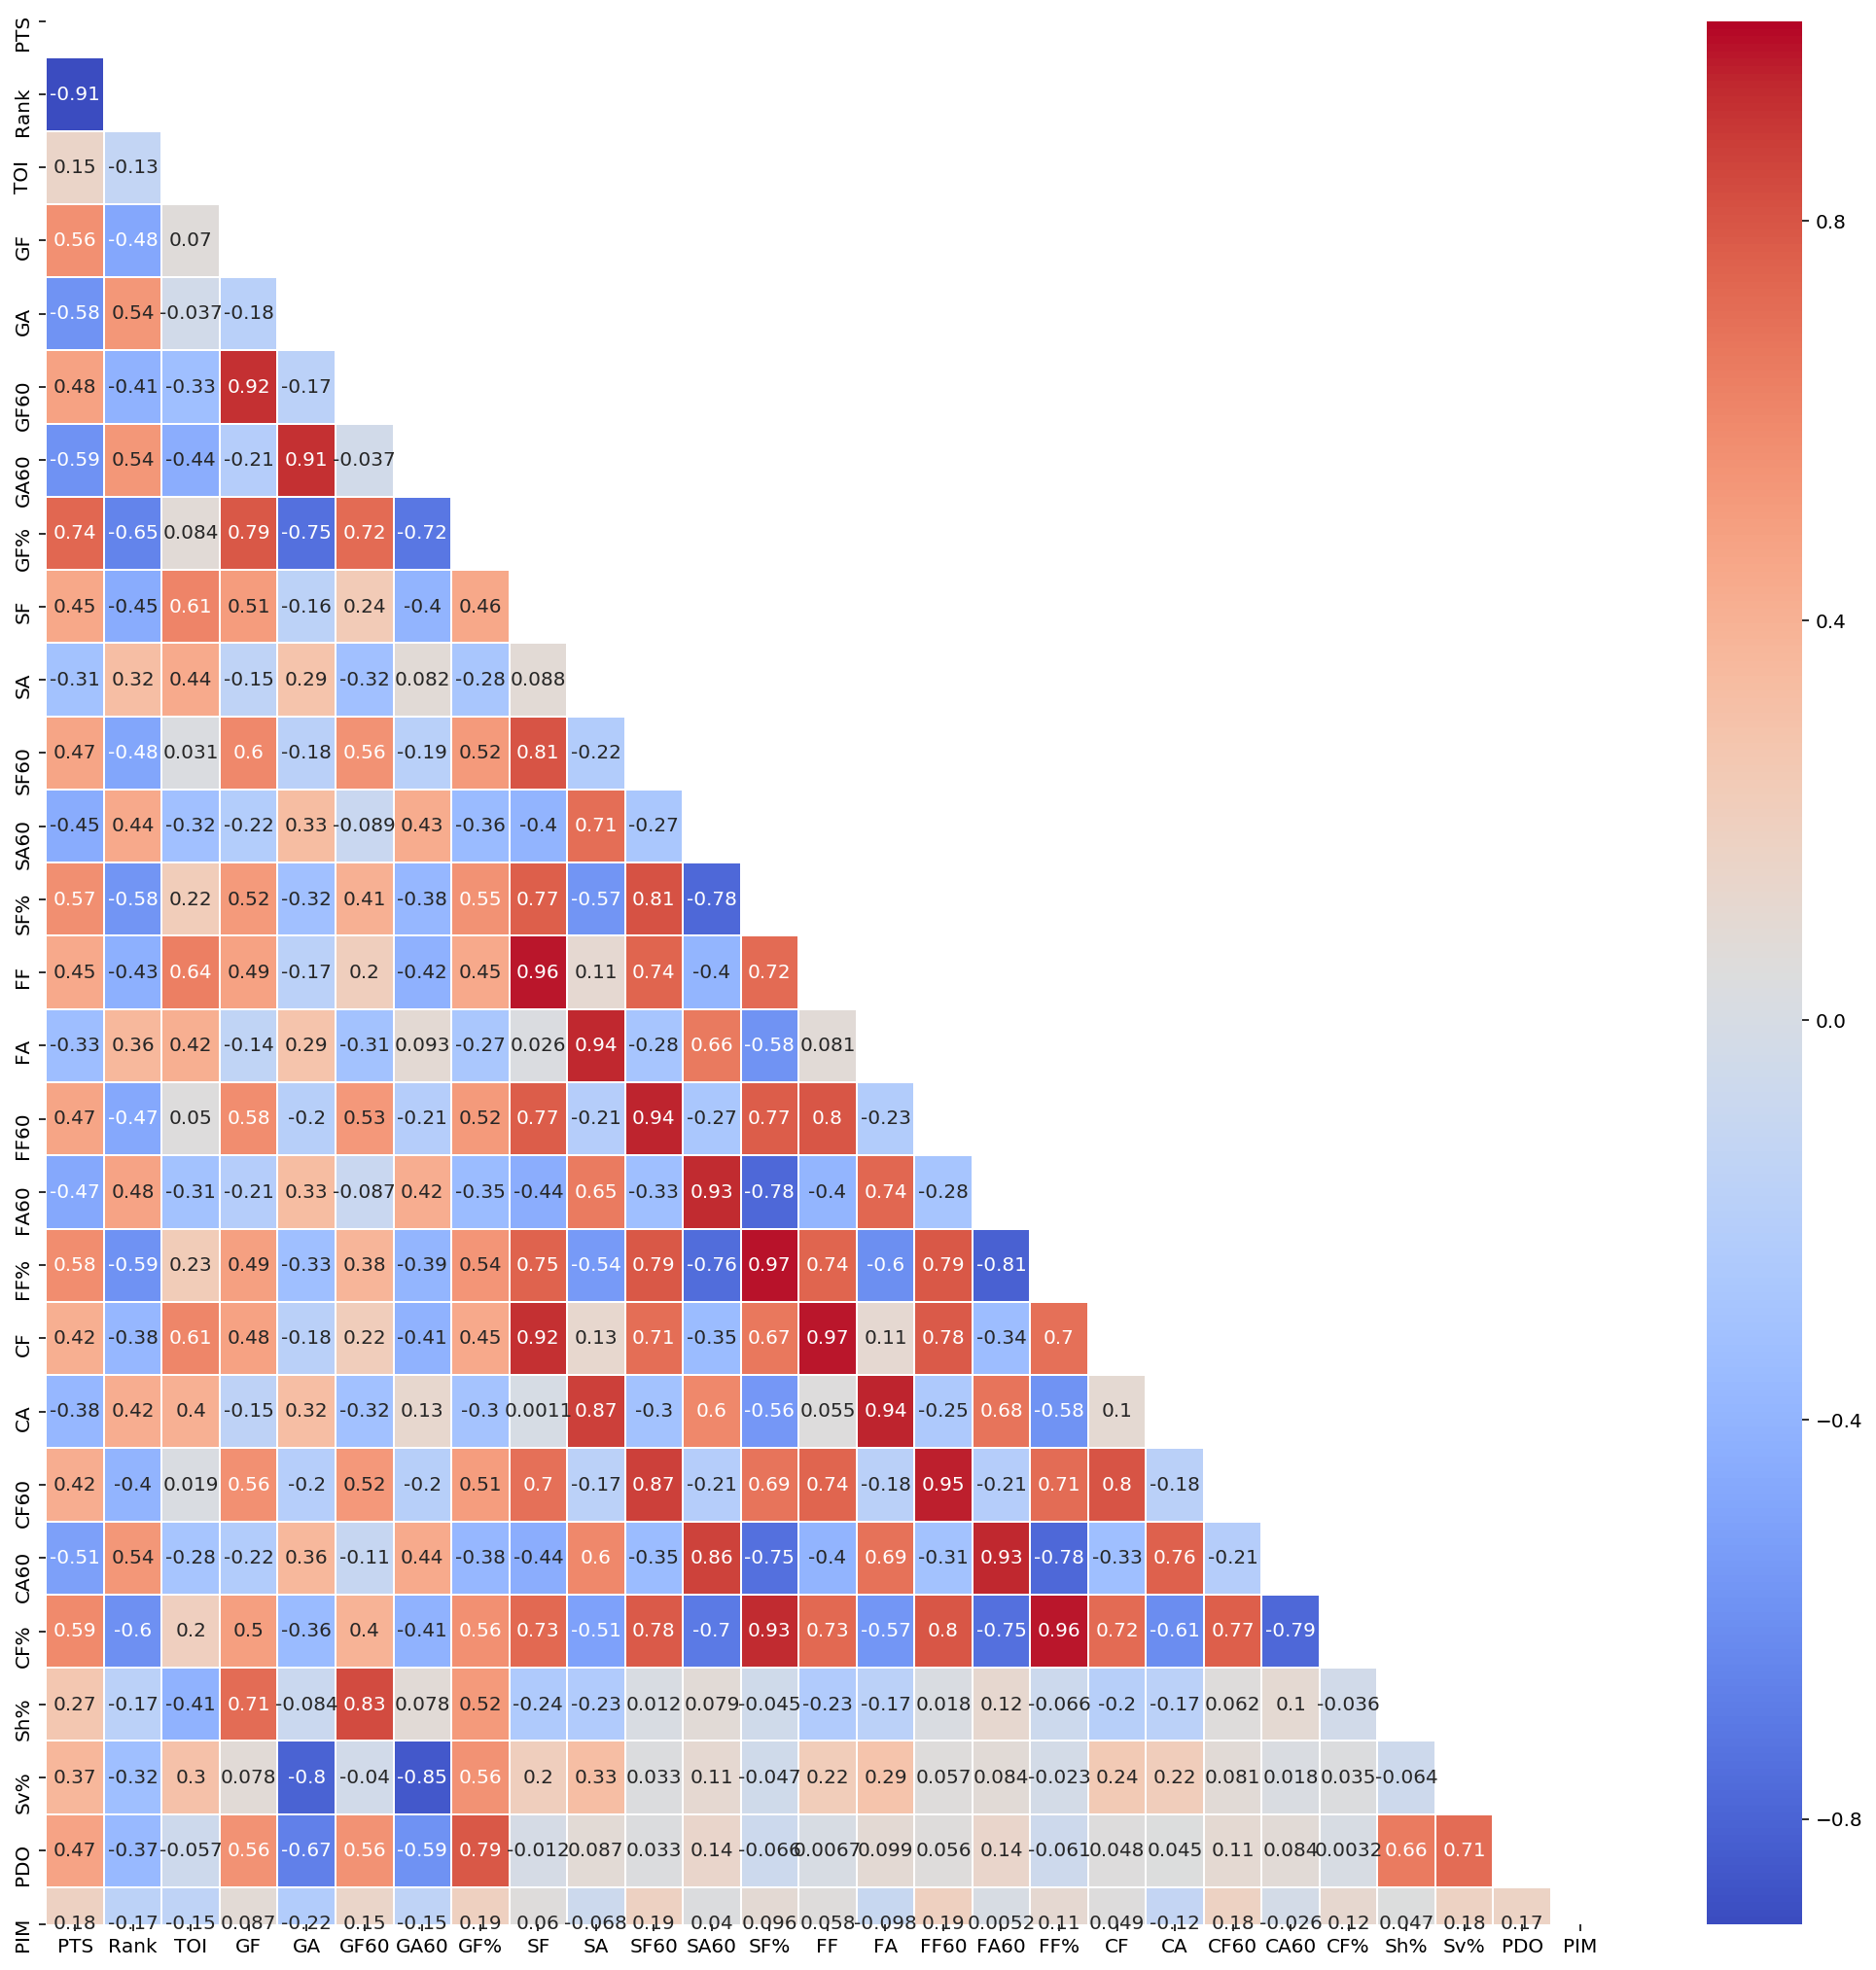

In [169]:

corr = nhl._get_numeric_data().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,18))
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linecolor='white',\
                linewidth=.5)

#sns.heatmap(, cmap='coolwarm', linecolor='white', linewidths=.5)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [170]:
from scipy import stats 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [210]:
y = nhl['Rank']

In [214]:
# There are three target classes 
nhl['Rank'].unique()

array([1, 2, 3])

In [211]:
x = nhl.drop(columns='Rank')
x = x._get_numeric_data()

In [212]:
from sklearn.model_selection import train_test_split 

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
#while in this exercise it says to standardize below I'm standardizing up top as it's best
#as it's generally best practice.

In [215]:
SS = StandardScaler() 

In [218]:
standardized_x_train = SS.fit_transform(x_train) 
standardized_x_test = SS.transform(x_test)

### 4. What is the baseline accuracy?

In [219]:
# A: 
y.value_counts()/y.count()
#porportion of the majority class 

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [185]:
from sklearn.feature_selection import mutual_info_classif

In [220]:
#based on our mutual information scores these should be our top four predictors to use
mutual_info_df = pd.DataFrame(mutual_info_classif(standardized_x_train, y_train, n_neighbors=1), x.columns).sort_values(by=0, ascending=False)
mutual_info_df.columns = ['Mutual Info Scores']
mutual_info_df.head(4)

,Mutual Info Scores
PTS,1.107342
GA60,0.352828
CF60,0.321598
FF%,0.303237


In [239]:
standardized_x_train = pd.DataFrame(standardized_x_train, columns=x.columns)


In [248]:
standardized_x_train.head(2)

,PTS,TOI,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,0.681897,-0.493216,1.556568,0.359221,1.663594,0.534322,0.752934,1.019763,-1.301764,1.772254,...,1.331437,0.875960,-0.487756,1.595237,-0.174804,1.007402,0.868686,-1.252105,-0.254077,-0.296666
1,1.598695,-1.123640,0.582722,-1.546147,1.037889,-1.010095,1.416175,-0.086701,-0.502754,0.808660,...,0.349993,0.011262,-0.689482,0.979280,0.091880,0.497100,0.726516,1.414752,1.512479,1.415196


In [252]:
standardized_x_train.columns

Index(['PTS', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF', 'SA', 'SF60',
       'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF', 'CA', 'CF60',
       'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [262]:
#I am eliminating extra columns to reflect my above feature selection
standardized_x_train = standardized_x_train[['PTS', 'GA60', 'CF60', 'FF%']]

In [268]:
standardized_x_test = pd.DataFrame(standardized_x_test, columns=x.columns)

In [269]:
standardized_x_test = standardized_x_test[['PTS', 'GA60', 'CF60', 'FF%']]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [264]:
KNN = KNeighborsClassifier(n_neighbors=1, weights='uniform')

In [270]:
KNN.fit(standardized_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [271]:
y_predicted = KNN.predict(standardized_x_test)

In [272]:
from sklearn.metrics import accuracy_score

In [273]:
accuracy_score(y_predicted, y_test)

0.6956521739130435

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A: This score is nearly double the baseline accuracy score! 
# Because we don't have a perfect accuracy score, which would mean something has gone wrong- I'd say these scores are legit! 

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [274]:
half_x_train, half_x_test, half_y_train, half_y_test = train_test_split(x, y, test_size=0.5)


In [276]:
#restandardizing 
standardized_half_x_train = pd.DataFrame(SS.transform(half_x_train), columns=x.columns)

In [277]:
standardized_half_x_test = pd.DataFrame(SS.transform(half_x_test), columns=x.columns)

In [278]:
#filtering again for results of feature selection
standardized_half_x_train = standardized_half_x_train[['PTS', 'GA60', 'CF60', 'FF%']]
standardized_half_x_test = standardized_half_x_test[['PTS', 'GA60', 'CF60', 'FF%']]

In [298]:
KNN.fit(standardized_half_x_train, half_y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [302]:
half_y_predict = KNN.predict(standardized_half_x_test)

In [294]:
half_y_test = np.array(half_y_test)
half_y_test = half_y_test.reshape(-1, 1)

In [295]:
half_y_train = np.array(half_y_train)
half_y_train = half_y_train.reshape(-1, 1)

In [303]:
accuracy_score(half_y_predict, half_y_test)

0.8

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [304]:
KNN = KNeighborsClassifier(n_neighbors=standardized_half_x_test.shape[0])

In [305]:
KNN.fit(standardized_half_x_train, half_y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [307]:
y_predicted = KNN.predict(standardized_half_x_test)

In [308]:
#increasing the number of K was not a good idea here because we have
#significantly decreased accuracy 
accuracy_score(y_predicted, half_y_test)

0.28888888888888886

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [309]:
x.shape

(90, 26)

In [311]:
#I will use the original train-test split since that was originally more accurate
accuracy_scores_across_k = [] 

for i in range(1, standardized_x_train.shape[0]+1): 
    KNN = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    KNN.fit(standardized_x_train, y_train)
    accuracy_scores_across_k.append(KNN.score(standardized_x_test, y_test))
    

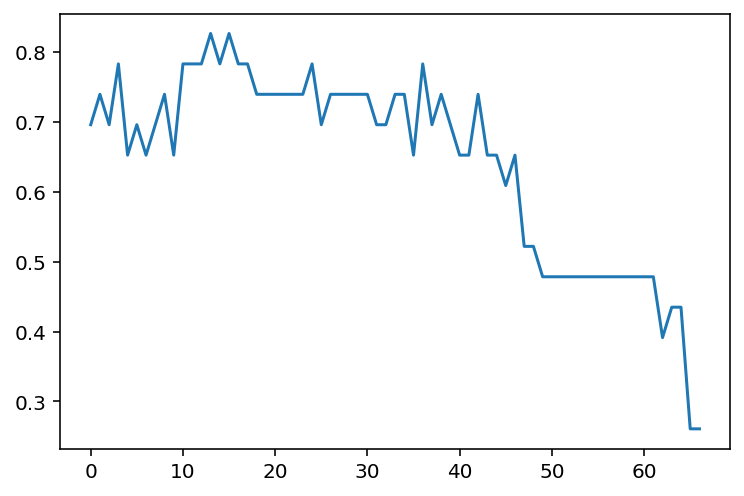

In [318]:
plt.plot(accuracy_scores_across_k)